# UNIT 09 우리 동네 인구 구조를 파이 차트로 나타내기

## 1. 제주도에는 여성의 비율이 더 높을까
---
새로운 형태의 그래프를 그리기 전에, 제주특별자치도의 성별 분포를 항아리 모양 그래프로 그려보자. 

In [1]:
import matplotlib.font_manager as fm
import matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)


In [2]:
import matplotlib
import matplotlib.font_manager as fm 
fm._rebuild()

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumSquareRound',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundB.ttf'),
 ('NanumSquare',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareB.ttf'),
 ('NanumBarunGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothicBold.ttf'),
 ('NanumMyeongjo',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoBold.ttf'),
 ('NanumMyeongjo',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjo.ttf'),
 ('NanumGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'),
 ('NanumSquare',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareR.ttf'),
 (

찾고 싶은 지역의 이름을 알려주세요 : 제주특별자치도


ValueError: shape mismatch: objects cannot be broadcast to a single shape

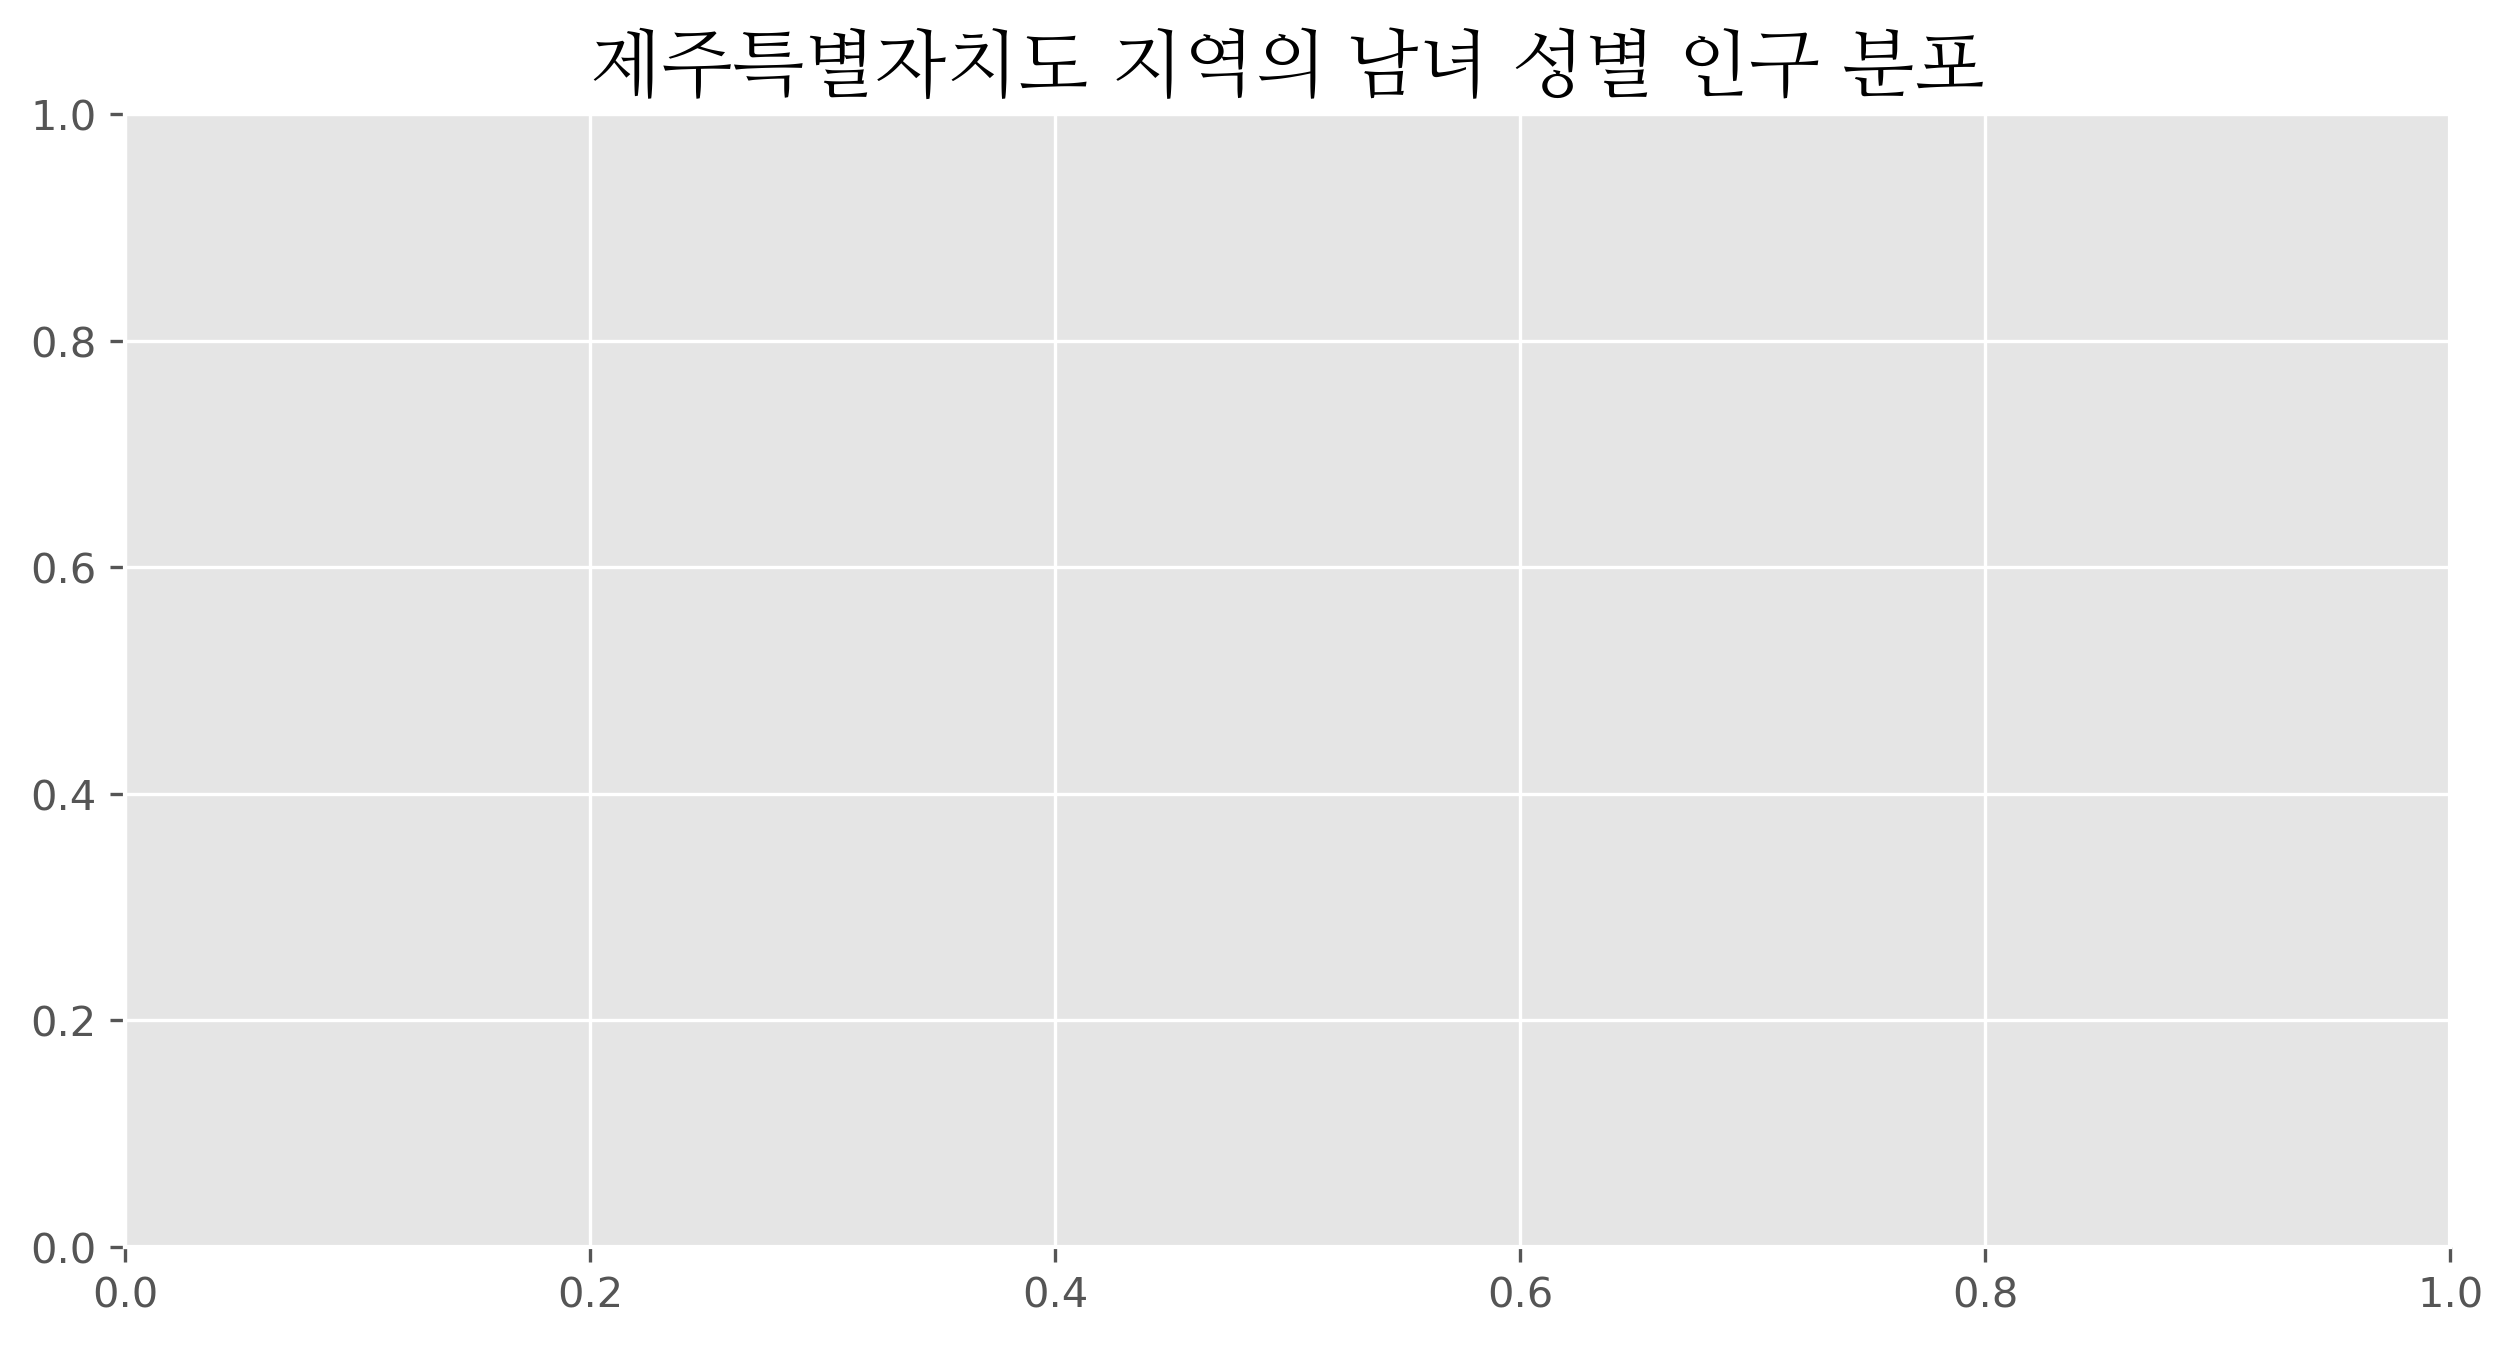

In [3]:
import csv
f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)

m = []
f = []

name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data :
    if name in row[0] :
        for i in row[3:104] :
            m.append(-int(i.replace(',', '')))
        for i in row[106:] :
            f.append(int(i.replace(',', '')))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)
# plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(name + ' 지역의 남녀 성별 인구 분포', fontproperties=fontprop)
plt.barh(range(101), m, label = 'Male')
plt.barh(range(101), f, label = 'Female')
plt.legend()
plt.show()

오류가 난다. 

In [4]:
print(len(m), len(f))

4646 4646


4646이라는 터무니 없는 값이 나왔다. 

원인은 제주특별자치도라는 단어가 포함된 지역 이름이 총 46개여서 하나의 그래프로 표현해야 하는 상황으로 인해 생긴 것이다. 이 오류를 수정하기 위해서는 가장 위에 있는 제주특별자치도 전체에 대한 데이터만 찾아야 한다. `break`문을 추가해주자.

찾고 싶은 지역의 이름을 알려주세요 : 제주특별자치도


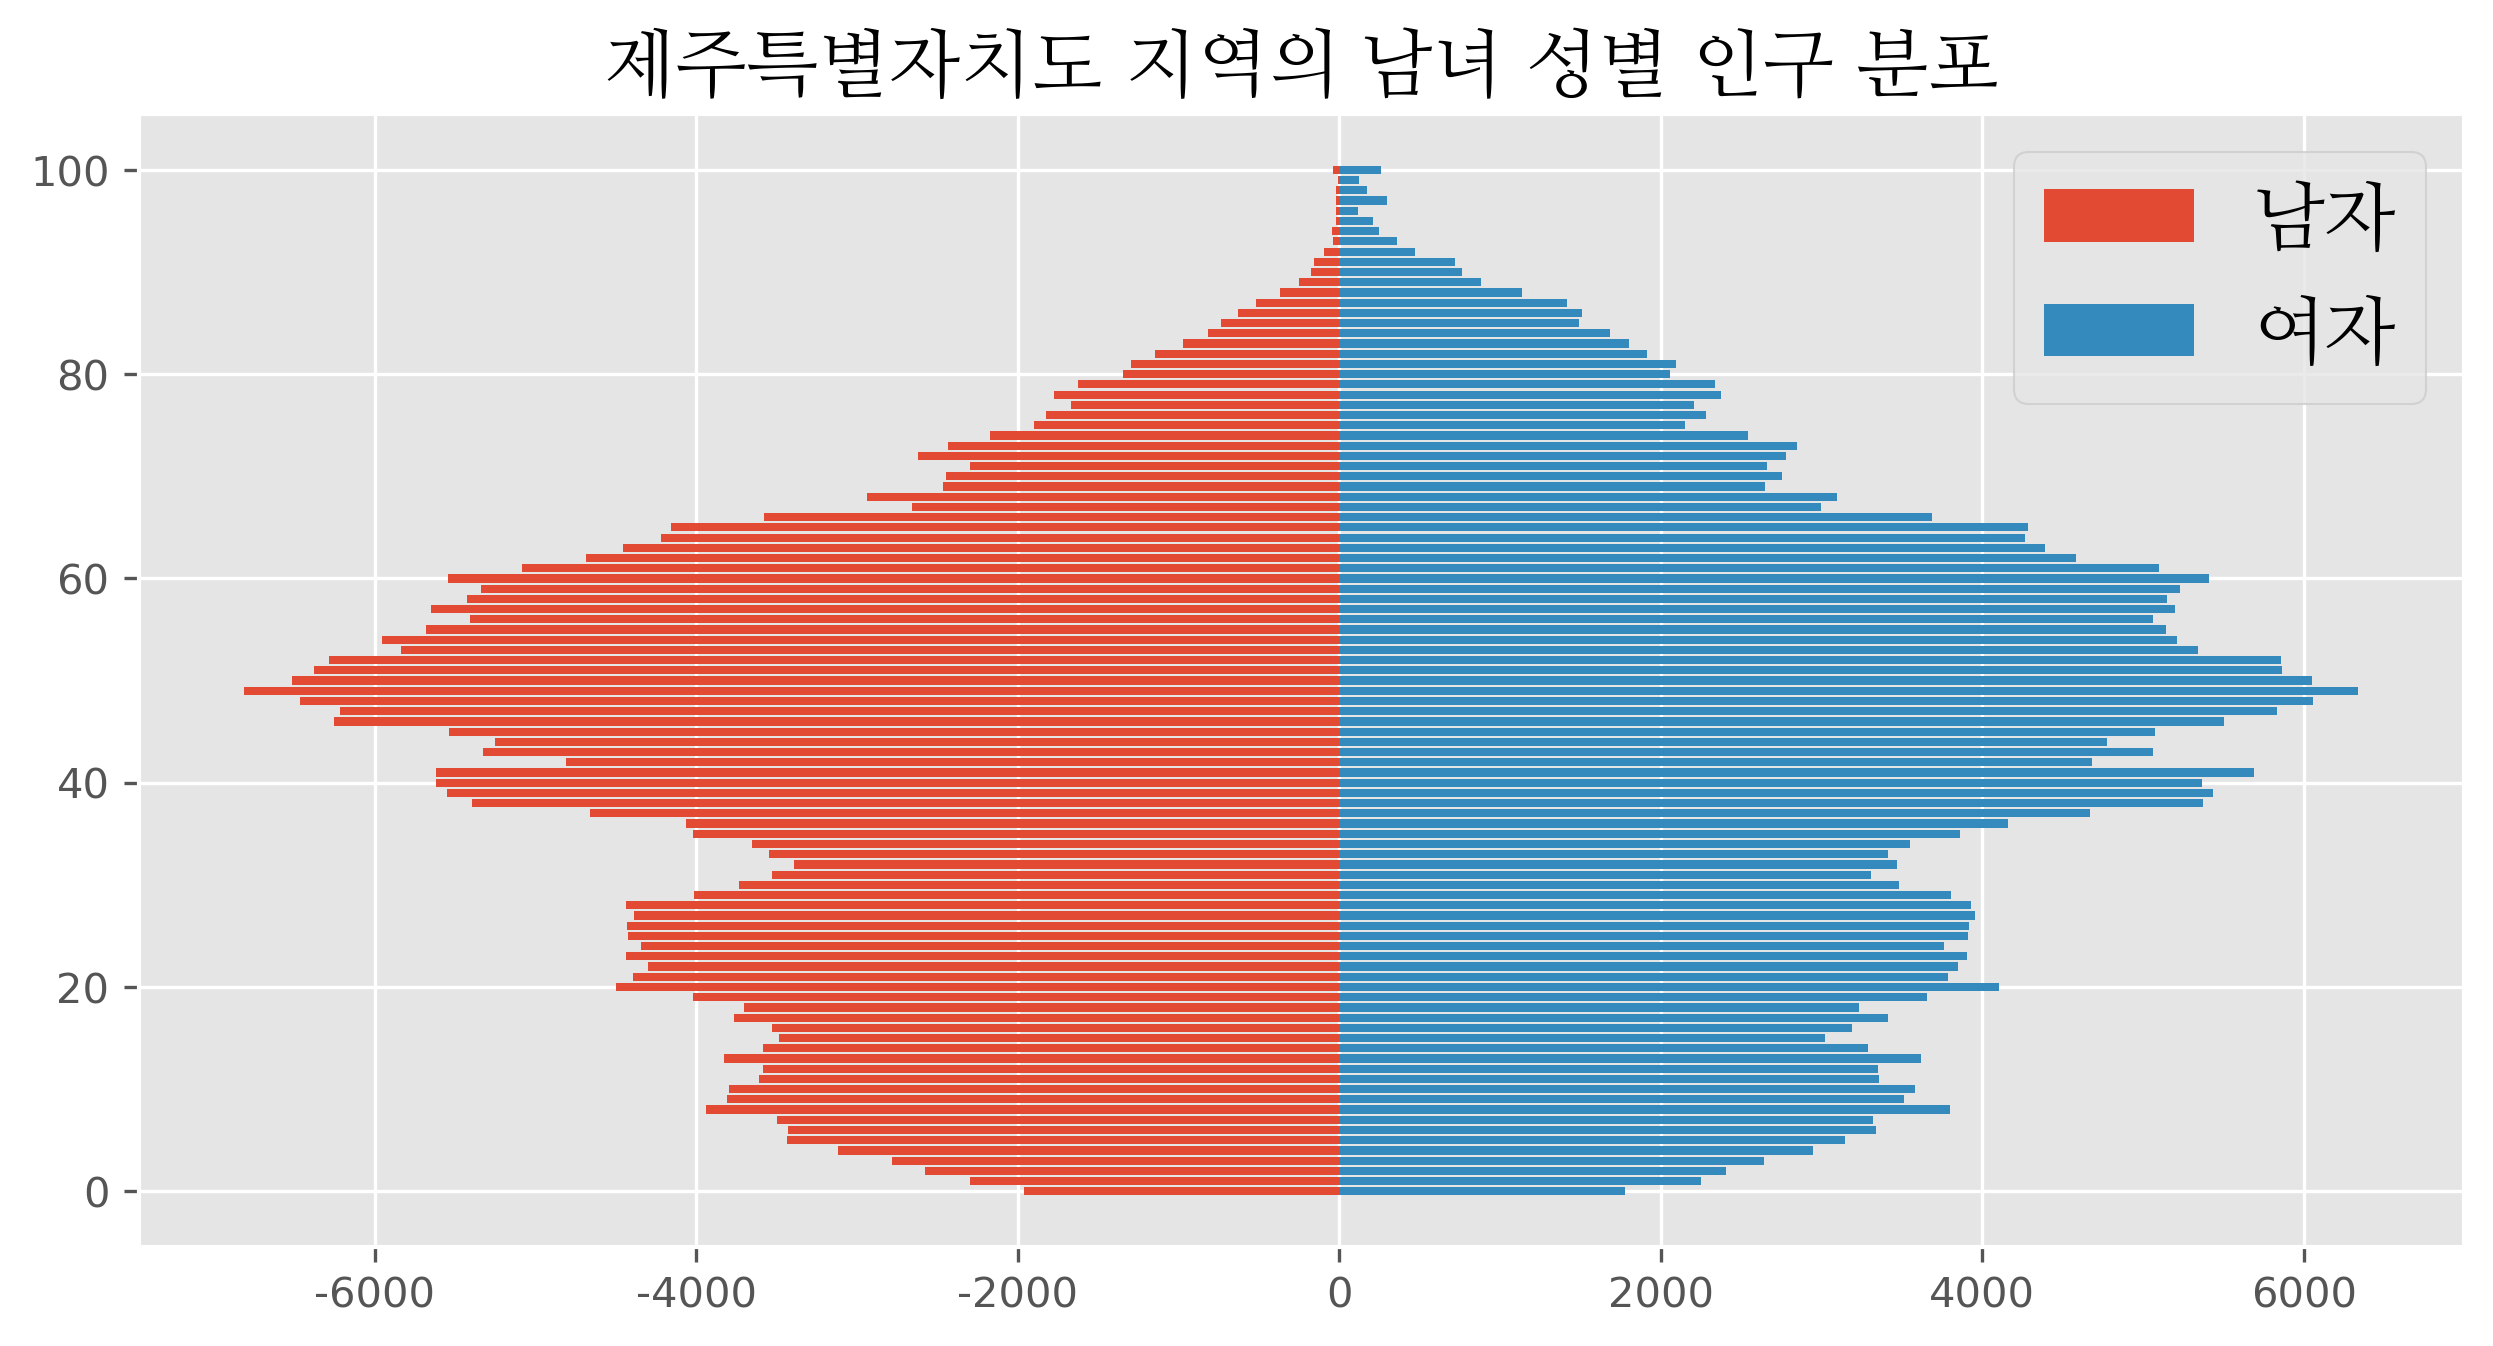

In [5]:
import csv
f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)

m = []
f = []

name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data :
    if name in row[0] :
        for i in row[3:104] :
            m.append(-int(i.replace(',', '')))
        for i in row[106:] :
            f.append(int(i.replace(',', '')))
        break

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)
# plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(name + ' 지역의 남녀 성별 인구 분포', fontproperties=fontprop)
plt.barh(range(101), m, label = '남자')
plt.barh(range(101), f, label = '여자')
plt.legend(prop=fontprop)
plt.show()

## 혈액형 비율 표현하기
---
각 혈액형의 비율을 `pie()` 함수로 표현해보자.

### pie() 함수
---
파이 차트는 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현한다.

다음은 `pie()` 함수를 사용한 예로, `pyplot` 라이브러리를 불러온 후 `pie()` 함수의 괄호 안에 값을 입력하여 파이 차트를 그리는 코드이다.

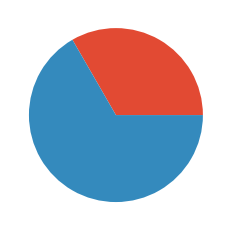

In [6]:
import matplotlib.pyplot as plt
plt.pie([10,20])
plt.show()

###  동그란 원 그리기
---
`axis()` 함수를 추가하여 동그란 원을 그릴 수 있다. 

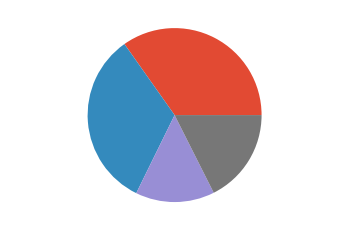

In [7]:
import matplotlib.pyplot as plt
size = [2441, 2312, 1031, 1233]
plt.axis('equal')
plt.pie(size)
plt.show()

### 레이블 추가하기
---
`label`이라는 리스트에 4개의 항목을 저장하자. 이후 `pie()` 함수의 labels 속성에 값을 넣어 각 항목의 의미를 쉽게 알 수 있게 해보자.

In [8]:
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

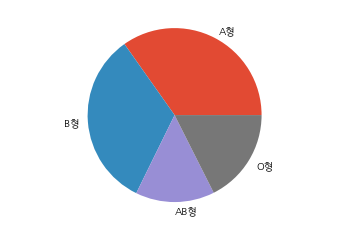

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumGothic')
size = [2441, 2312, 1031, 1233]
label = ['A형','B형','AB형', 'O형']
plt.axis('equal')
plt.pie(size, labels = label) 
plt.show()

### 비율 및 범례 표시하기
---
`pie()` 함수의 `autopct` 속성을 사용하여 각 항목의 비율을 표시해보자.

`autopct` 속성은 auto percent를 의미하며, 어떤 형태로 값을 표시할지 작성ㅇ하면 각 항목의 비율을 자동으로 계산해서 표시한다.

소숫점 아래 둘째 자리에서 반올림한 값을 표시하고자 autopct 속성을 `%.1f%%`로 지정하자.

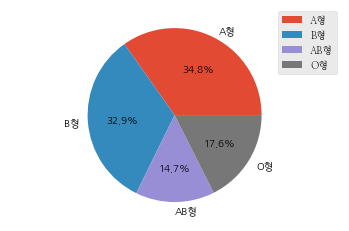

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
size = [2441, 2312, 1031, 1233]
label = ['A형','B형','AB형', 'O형']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%')   # 비율 및 범례 추가
plt.legend(prop=fontprop)
plt.show()

### 색 및 돌출 효과 정하기
---
색은 `colors` 속성으로 설정 할 수 있다. 또한, 특정 혈액형의 비율이 돌출하는 효과는 `explode` 속성으로 설정할 수 있다. 

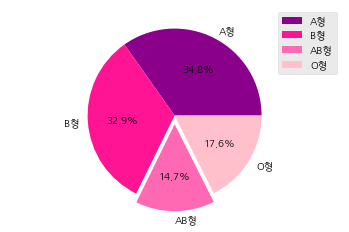

In [15]:
plt.rc('font', family = 'NanumGothic')
size = [2441, 2312, 1031, 1233]
label = ['A형','B형','AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%', explode = (0,0,0.1,0), colors = color)
plt.legend()
plt.show()

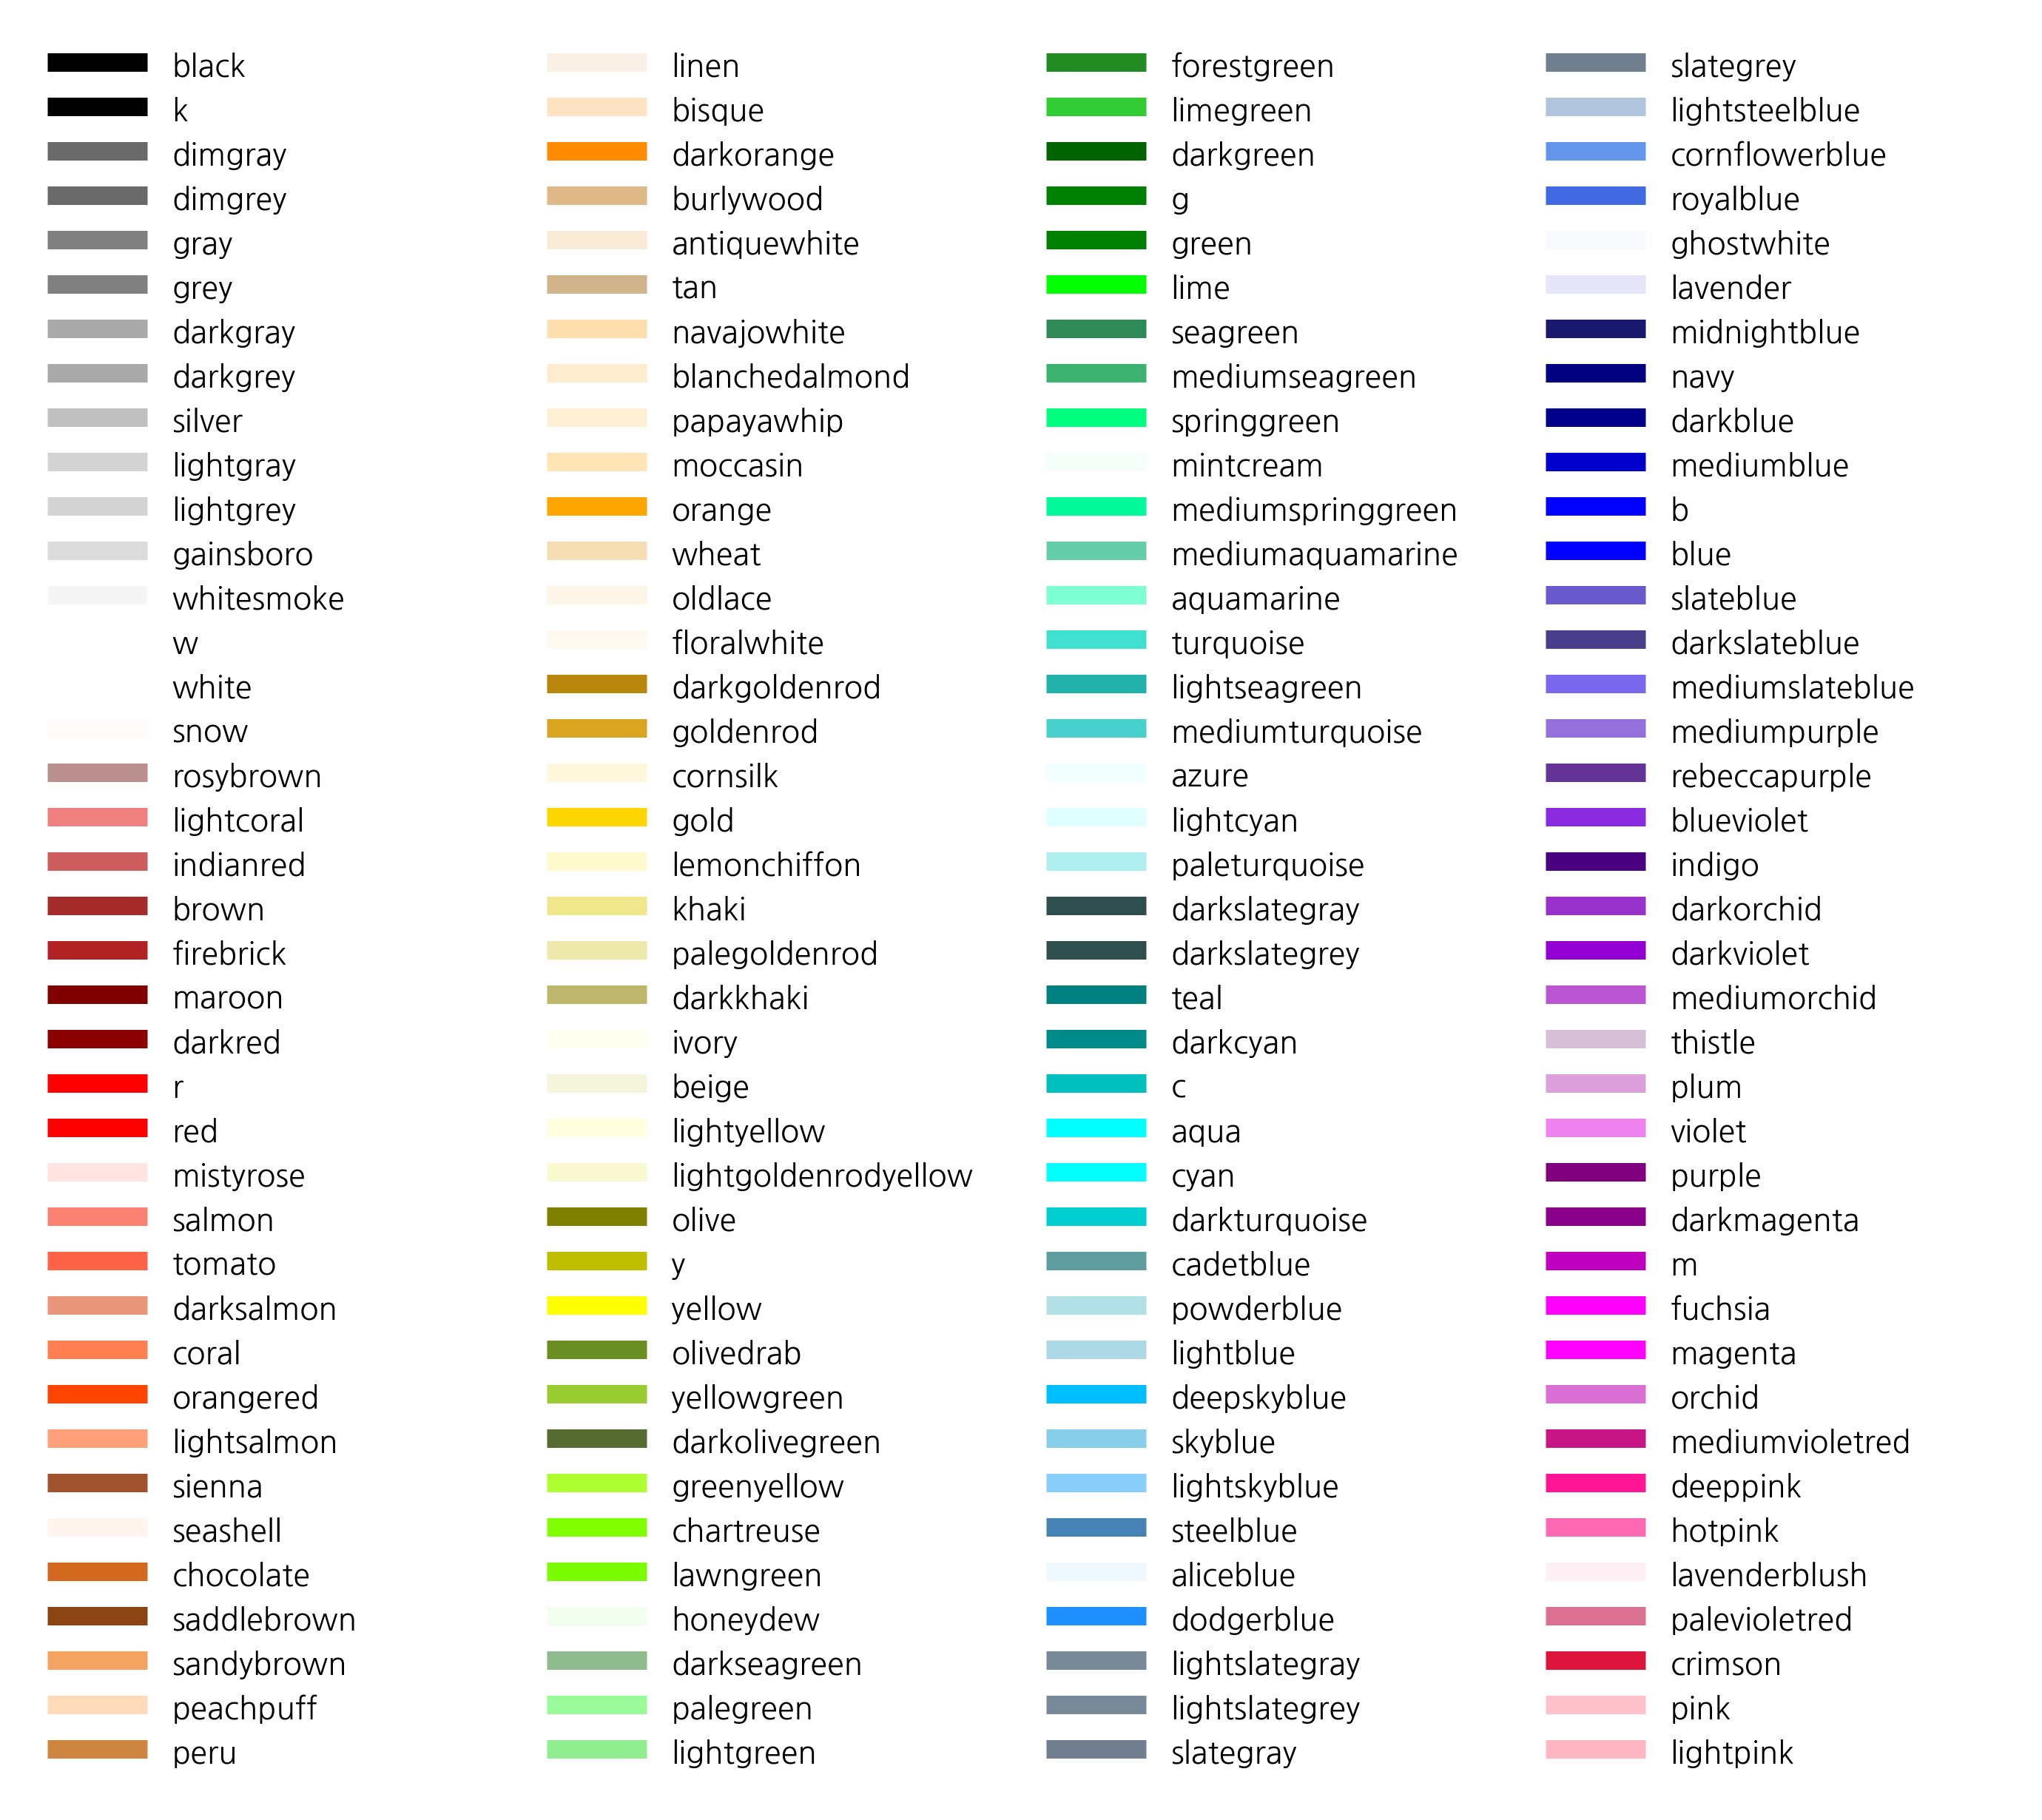

In [16]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols

fig, ax = plt.subplots(figsize=(9, 8), dpi = 300)

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    row = i % nrows
    col = i // nrows
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(10),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

## 3. 제주도의 성별 인구 비율 표현하기
---
성별 인구 비율을 표현하려면, 성별 합계 데이터를 구해야한다. 남성 인구 총합과 여성 인구 총합을 저장할 변수 2개가 필요하다. 남성 인구는 `row` 리스트의 3-103번까지, 여성 인구는 `row` 리스트의 106-116번까지의 데이터를 더하여 구할 수 있다.

`range()` 함수를 사용하면 `row`리스트의 인댁스를 좀더 쉽게 다룰 수 있다.

In [18]:
f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)

size = []
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')

for row in data:
    if name in row[0]:
        m = 0
        f = 0
        for i in range(101):
            m += int(row[i+3].replace(',', '')) #3~103번까지 데이터 더하기
            f += int(row[i+106].replace(',', '')) #106~206번까지 데이터 더하기
        break
        
size.append(m)
size.append(f)
print(size)

찾고 싶은 지역의 이름을 알려주세요 : 제주특별자치도
[338553, 336062]


결과를 보니 남성이 더 많다는 것을 알 수 있다. 이제 이 결과를 파이 차트로 표현하자.

찾고 싶은 지역의 이름을 알려주세요 : 청담동


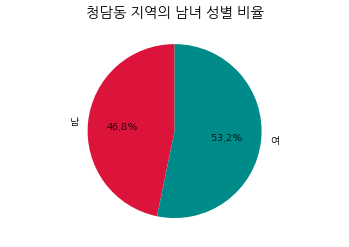

In [22]:
f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)

size = []

name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data :
    if name in row[0] :
        m = 0
        f = 0
        for i in range(101) :
            m += int(row[i+3])
            f += int(row[i+106])
        break
size.append(m)
size.append(f)

import matplotlib.pyplot as plt
plt.rc('font', family ='NanumGothic')
color = ['crimson', 'darkcyan']
plt.axis('equal')
plt.pie(size, labels = ['남','여'], autopct ='%.1f%%', colors = color, startangle =90)
plt.title(name + ' 지역의 남녀 성별 비율')
plt.show()